In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Optional

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.utils.validation import NotFittedError

#### Создание данных

Text(0, 0.5, '$feature_2$')

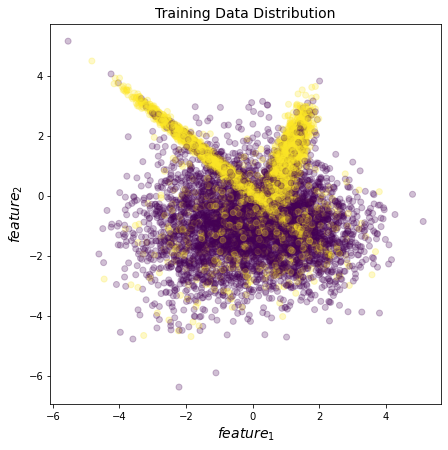

In [4]:
data, target = make_classification(
    n_samples=10000,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=2,
    random_state = 27,
    flip_y=0.25
)

fig = plt.figure(figsize=(7, 7))
plt.title("Training Data Distribution", size=14)
plt.scatter(data[:, 0], data[:, 1], c=target, cmap='viridis', alpha=0.25)
plt.xlabel("$feature_1$", size=14)
plt.ylabel("$feature_2$", size=14)

In [7]:
x_train, x_valid = train_test_split(
    data, train_size=0.8, shuffle=True, random_state=27
)
y_train, y_valid = train_test_split(
    target, train_size=0.8, shuffle=True, random_state=27)

In [8]:
class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [9]:
class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        # подсчет количества объектов разных классов
        classes = {}  # сформируем словарь "класс: количество объектов"
        for label in self.labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
        #  найдем класс, количество объектов которого будет максимальным в этом листе и вернем его    
        prediction = max(classes, key=classes.get)
        return prediction        

#### Реализация дерева решений

In [18]:
class DecisionTreeClassifier:
    def __init__(
        self,
        max_depth: int = 6,
        num_leaves: int = 64,
        mean_samples_leaf: int = 5,
        criterion: str = 'gini'):
    
        self.max_depth = max_depth,
        self.num_leaves = num_leaves,
        self.mean_samples_leaf = mean_samples_leaf
    
        if criterion not in ["gini", "entropy"]:
            raise ValueError(
            "Incorrect criterion value. Please use: 'gini' or 'entropy'."
            )
        self.information_criterio = self.calculate_gini if criterion =="gini" else self.calculate_entropy
        self.current_leaves = 0
        self.current_depth = 0
        self.tree = None

In [ ]:
    def fit(self, X: np.array, y: np.array):
        self.tree = self.build_tree(X, y)
        return self

In [ ]:
    def predict(self, X: np.array):
        if not self.tree:
            raise NotFittedError(
            "This DecisionTreeClassifier instance is not fitted yet."
            "Call 'fit' with appropriate arguments before using this estimator"
            )
        y_pred = []
        for x in X:
            prediction = self.classify_object(x, self.tree)
            y_pred.append(prediction)
        return y_pred

In [14]:
@staticmethod
def calculate_gini(y_pred: np.array):
    #  подсчет количества объектов разных классов
    classes = {}
    for label in y_pred:
        if label not in classes:
            classes[label] = 0
        classes[label] += 1
    
    #  расчет критерия
    score = 1
    for label in classes:
        p = classes[label] / len(y_pred)
        score -= p ** 2
        
    return score

In [15]:
@staticmethod
def calculate_entropy(y_pred: np.array):
    #  подсчет количества объектов разных классов
    classes = {}
    for label in y_pred:
        if label not in classes:
            classes[label] = 0
        classes[label] += 1
    
    #  расчет критерия
    score = 0
    for label in classes:
        p = classes[label] / len(y_pred)
        score += p *np.log2(p)
        
    return -score

In [13]:
def quality(self, left_labels, right_labels, current_gini):

    # доля выбоки, ушедшая в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    right_p = self.information_criterio(right_labels)
    left_p = self.information_criterio(left_labels)
    
    return current_gini - p * left_p - (1 - p) * right_p

In [19]:
def split(self, data, labels, index, t):
    left = np.where(data[:, index]<=t)
    right = np.where(data[:, index] > t)
    true_data = data[left]
    false_data = data[right]
    true_labels = labels[left]
    false_labels = labels[right]
    
    return true_data, false_data, true_labels, false_labels

In [ ]:
def find_best_split(self, X, y):
    current_quality = self.information_criterio(y)
    
    best_quality = o
    best_t = None
    best_index = None
    n_features = X.shape[1]
    
    for index in range(n_features):
        t_values = np.unique([row[index] for row in X])
        for t in t_values:
            true_data, false_data, true_labels, false_labels = self.split(X, y, index, t)